In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
necessary_col = ['windspeedKmph', 'winddirDegree','precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'ArrDel15']

In [3]:
data = pd.read_csv('../cleaned_data.csv')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851422 entries, 0 to 1851421
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   FlightDate         object 
 2   Quarter            int64  
 3   Year               int64  
 4   Month              int64  
 5   DayofMonth         int64  
 6   DepTime            float64
 7   DepDel15           float64
 8   CRSDepTime         int64  
 9   DepDelayMinutes    float64
 10  OriginAirportID    int64  
 11  DestAirportID      int64  
 12  ArrTime            float64
 13  CRSArrTime         int64  
 14  ArrDelayMinutes    float64
 15  Origin             object 
 16  Dest               object 
 17  RoundedFlightDate  object 
 18  DepatHr            int64  
 19  ArrDel15           float64
 20  Delayed            int64  
 21  date               object 
 22  airport            object 
 23  windspeedKmph      int64  
 24  winddirDegree      int64  
 25  weatherCode       

In [85]:
Df = data.iloc[:, 1:]#[necessary_col]

In [86]:
Df = pd.concat([Df, pd.get_dummies(Df['Origin'],prefix='Origin')], axis=1)

In [87]:
Df = pd.concat([Df, pd.get_dummies(Df['Dest'],prefix='Destination')], axis=1)

In [88]:
Df.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime',
       'DepDel15', 'CRSDepTime', 'DepDelayMinutes', 'OriginAirportID',
       'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDelayMinutes', 'Origin',
       'Dest', 'RoundedFlightDate', 'DepatHr', 'ArrDel15', 'Delayed', 'date',
       'airport', 'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'time', 'timeInHr', 'Origin_ATL',
       'Origin_CLT', 'Origin_DEN', 'Origin_DFW', 'Origin_EWR', 'Origin_IAH',
       'Origin_JFK', 'Origin_LAS', 'Origin_LAX', 'Origin_MCO', 'Origin_MIA',
       'Origin_ORD', 'Origin_PHX', 'Origin_SEA', 'Origin_SFO',
       'Destination_ATL', 'Destination_CLT', 'Destination_DEN',
       'Destination_DFW', 'Destination_EWR', 'Destination_IAH',
       'Destination_JFK', 'Destination_LAS', 'Destination_LAX',
       'Destination_MCO', 'Destination_MIA', 'Destination_O

In [90]:
tmp = Df[['Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime',
       'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'ArrTime', 'CRSArrTime', 'ArrDelayMinutes', 'DepatHr']]

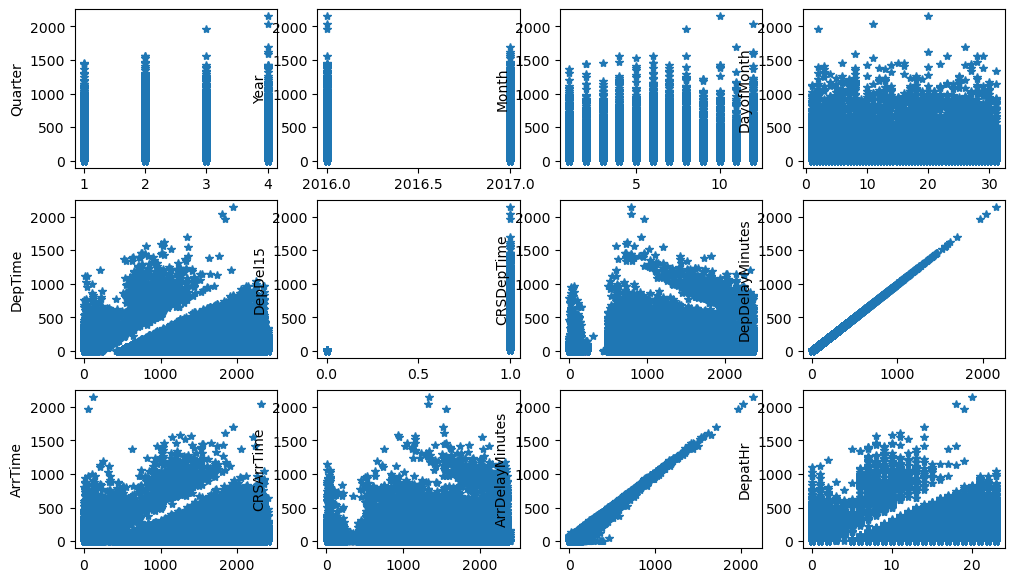

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.tight_layout()
for i, col in enumerate(tmp):
    plt.subplot(3,4, i+1)
    plt.ylabel(col)
    plt.plot(tmp[col], Df['DepDelayMinutes'], linestyle="", marker="*")
plt.show()

In [100]:
Df = Df[[ 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime',
       'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'ArrTime', 'CRSArrTime', 'ArrDelayMinutes', 'DepatHr', 
       'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity',  'Origin_ATL',
       'Origin_CLT', 'Origin_DEN', 'Origin_DFW', 'Origin_EWR', 'Origin_IAH',
       'Origin_JFK', 'Origin_LAS', 'Origin_LAX', 'Origin_MCO', 'Origin_MIA',
       'Origin_ORD', 'Origin_PHX', 'Origin_SEA', 'Origin_SFO',
       'Destination_ATL', 'Destination_CLT', 'Destination_DEN',
       'Destination_DFW', 'Destination_EWR', 'Destination_IAH',
       'Destination_JFK', 'Destination_LAS', 'Destination_LAX',
       'Destination_MCO', 'Destination_MIA', 'Destination_ORD',
       'Destination_PHX', 'Destination_SEA', 'Destination_SFO',  'ArrDel15']]


In [101]:
Df.head()

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,ArrTime,CRSArrTime,...,Destination_JFK,Destination_LAS,Destination_LAX,Destination_MCO,Destination_MIA,Destination_ORD,Destination_PHX,Destination_SEA,Destination_SFO,ArrDel15
0,1,2016,1,1,6.0,1.0,2347,19.0,721.0,714,...,0,0,0,0,1,0,0,0,0,0.0
1,1,2016,1,1,24.0,0.0,20,4.0,655.0,705,...,0,0,0,0,0,0,0,0,0,0.0
2,1,2016,1,1,6.0,0.0,2359,7.0,559.0,603,...,0,0,0,0,0,1,0,0,0,0.0
3,1,2016,1,1,25.0,0.0,30,0.0,810.0,823,...,0,0,0,0,1,0,0,0,0,0.0
4,1,2016,1,1,20.0,0.0,10,10.0,511.0,501,...,0,0,0,0,0,0,0,0,0,0.0


In [102]:
X_train, X_test, y_train, y_test = train_test_split(Df.iloc[:, :-1], Df.iloc[:, -1], 
                                                   stratify= Df.iloc[:, -1].values, train_size=0.8, random_state=2)


In [103]:
X_train.shape, y_train.shape

((1481137, 54), (1481137,))

In [104]:
(y_train).value_counts()

0.0    1170693
1.0     310444
Name: ArrDel15, dtype: int64

In [105]:
y_test.value_counts()

0.0    292674
1.0     77611
Name: ArrDel15, dtype: int64

In [77]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X_train, y_train)

In [109]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [110]:
reg = LogisticRegression()

In [111]:
%%time
model = reg.fit(X_train, y_train.values)

CPU times: user 6.54 s, sys: 357 ms, total: 6.9 s
Wall time: 6.9 s


In [112]:
X_test = sc.transform(X_test)
prediction = model.predict(X_test)
prediction.shape, y_test.values.shape

((370285,), (370285,))

In [113]:
accuracy_score(y_test.values, prediction)

1.0

In [114]:
f1_score(y_pred=prediction, y_true=y_test.values)

1.0

In [115]:
print(classification_report(y_pred=prediction, y_true=y_test.values))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    292674
         1.0       1.00      1.00      1.00     77611

    accuracy                           1.00    370285
   macro avg       1.00      1.00      1.00    370285
weighted avg       1.00      1.00      1.00    370285

